In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# .... dit zijn dus de single edge........
networks = [8,9,10,11,16,18,20,21,24] #4 weggehaald
# networks = [i for i in range(1,31)]

In [16]:
def get_performance(network: int, feature_set: str = 'II-A', model: str = 'LogisticRegression'):
    if feature_set == 'I+II-A+III-A':
        with open(f'/data/s3021637/{network:02}/properties/{feature_set}_{model}.float') as file:
            return float(file.read())
    with open(f'/data/s1620444/{network:02}/properties/{feature_set}_{model}.float') as file:
        return float(file.read())

In [23]:
def make_figure(df, xlabel, ylabel, name):
  auc_values = df[[ylabel, xlabel]].values.flatten()
  lim = (min(auc_values), 1)

  fontsize=8
  titlesize=10
  rc = {
    'xtick.top': True, 'ytick.right': True, 'figure.figsize': (3.30,3.3), 
    'axes.titlesize': titlesize, 
    'axes.labelsize': fontsize, 
    'xtick.labelsize': fontsize, 
    'ytick.labelsize': fontsize, 
    'legend.fontsize': fontsize, 
    'legend.title_fontsize': fontsize,
    'lines.linewidth': 1,
  #   'lines.markersize': 4,
    'legend.handlelength': .4,
    'font.family': 'sans-serif',
    'font.sans-serif': 'Helvetica',
    'savefig.transparent': True
  }

  with plt.rc_context(rc):
      ax = sns.regplot(data=df, x=xlabel, y=ylabel, scatter=False, color='black')
      sns.scatterplot(data=df, x=xlabel, y=ylabel, hue='Domain', style='Domain', ax=ax)
      ax.axline((0,0), (1,1), ls='--', c='black')
      ax.axis('scaled')
      ax.axis([.65, 1, .65, 1])
      ax.set_xlabel(xlabel)
      ax.set_ylabel(ylabel)
      ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(.01))
      ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(.01))
      ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.1))
      ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(.1))
      #   plt.legend()
      plt.tight_layout()
      plt.savefig(f'../figures/{name}.pdf')

## II-B vs (I+IIA+IIIA)

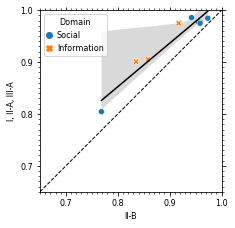

In [28]:
info = pd.read_json('../networks.jsonl', lines=True).set_index('index')
df_2b_123a = pd.DataFrame({
    'Domain': info['category'],
    'II-B': {network: get_performance(network, feature_set='II-B') for network in networks},
    'I, II-A, III-A': {network: get_performance(network, feature_set='I+II-A+III-A') for network in networks},
}).dropna()
make_figure(df_2b_123a, "II-B", 'I, II-A, III-A',"Fig3sets")

# II-A vs II-B

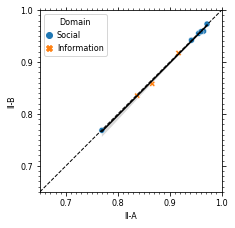

In [26]:
info = pd.read_json('../networks.jsonl', lines=True).set_index('index')
df_2a_2b = pd.DataFrame({
    'Domain': info['category'],
    'II-A': {network: get_performance(network, feature_set='II-A') for network in networks},
    'II-B': {network: get_performance(network, feature_set='II-B') for network in networks},
}).dropna()

make_figure(df_2a_2b, "II-A", "II-B", "Fig6")

# III-A vs III-B

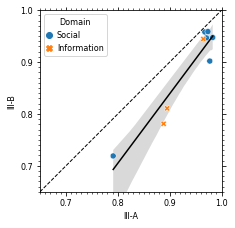

In [27]:
info = pd.read_json('../networks.jsonl', lines=True).set_index('index')
df_3a_3b = pd.DataFrame({
    'Domain': info['category'],
    'III-A': {network: get_performance(network, feature_set='III-A') for network in networks},
    'III-B': {network: get_performance(network, feature_set='III-B') for network in networks},
}).dropna()

make_figure(df_3a_3b, "III-A", "III-B", "FigNa")

# II-A vs III-A

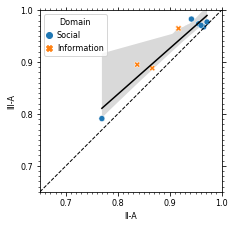

In [29]:
info = pd.read_json('../networks.jsonl', lines=True).set_index('index')
df_2a_3a = pd.DataFrame({
    'Domain': info['category'],
    'II-A': {network: get_performance(network, feature_set='II-A') for network in networks},
    'III-A': {network: get_performance(network, feature_set='III-A') for network in networks},
}).dropna()

make_figure(df_2a_3a, "II-A", "III-A", "Fig2a3a")

# II-B vs III-B

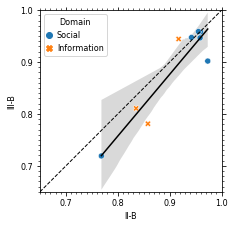

In [30]:
info = pd.read_json('../networks.jsonl', lines=True).set_index('index')
df_2b_3b = pd.DataFrame({
    'Domain': info['category'],
    'II-B': {network: get_performance(network, feature_set='II-B') for network in networks},
    'III-B': {network: get_performance(network, feature_set='III-B') for network in networks},
}).dropna()

make_figure(df_2b_3b, "II-B", "III-B", "Fig2b3b")

# I vs II-B

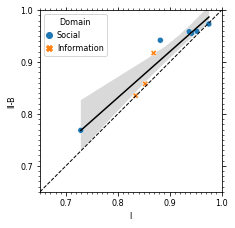

In [31]:
info = pd.read_json('../networks.jsonl', lines=True).set_index('index')
df_1_2b = pd.DataFrame({
    'Domain': info['category'],
    'I': {network: get_performance(network, feature_set='I') for network in networks},
    'II-B': {network: get_performance(network, feature_set='II-B') for network in networks},
}).dropna()

make_figure(df_1_2b, "I", "II-B", "Fig12b")

# I vs III-B

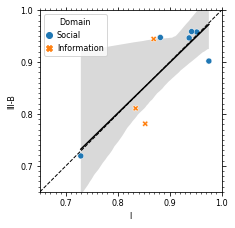

In [32]:
info = pd.read_json('../networks.jsonl', lines=True).set_index('index')
df_1_3b = pd.DataFrame({
    'Domain': info['category'],
    'I': {network: get_performance(network, feature_set='I') for network in networks},
    'III-B': {network: get_performance(network, feature_set='III-B') for network in networks},
}).dropna()

make_figure(df_1_3b, "I", "III-B", "Fig13b")